In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [4]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# Class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

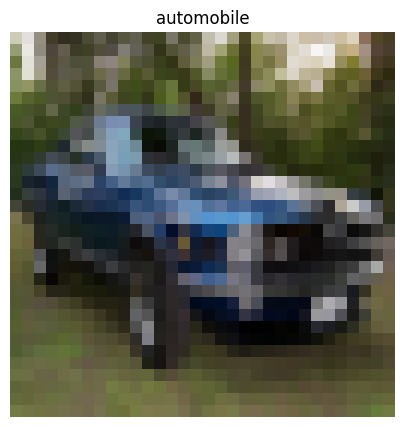

In [8]:

# Shuffle the training data
shuffle_index = np.random.permutation(len(train_images))
train_images_shuffled = train_images[shuffle_index]
train_labels_shuffled = train_labels[shuffle_index]

# Show a sample image and its label from the shuffled training set
plt.figure(figsize=(5,5))
plt.imshow(train_images_shuffled[0])
plt.title(class_names[train_labels_shuffled[0][0]])
plt.axis('off')
plt.show()


In [9]:
# Define the convolutional neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
])

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

c:\Users\bhavi\OneDrive\Desktop\RESEARCH\VSCODE\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3356 - loss: 1.7891 - val_accuracy: 0.5522 - val_loss: 1.2468
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5707 - loss: 1.2130 - val_accuracy: 0.6065 - val_loss: 1.1043
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6330 - loss: 1.0399 - val_accuracy: 0.6371 - val_loss: 1.0228
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6652 - loss: 0.9450 - val_accuracy: 0.6707 - val_loss: 0.9533
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7019 - loss: 0.8453 - val_accuracy: 0.6746 - val_loss: 0.9501
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7192 - loss: 0.7913 - val_accuracy: 0.6857 - val_loss: 0.9084
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7393 - loss: 0.7396 - val_accuracy: 0.6839 - val_loss: 0.9113
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7544 - loss: 0.6964 - 

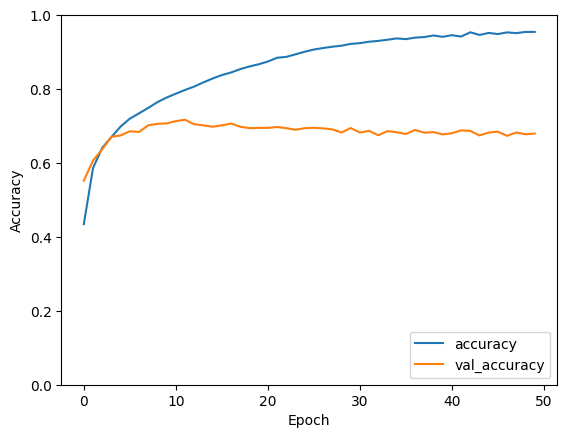

In [13]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


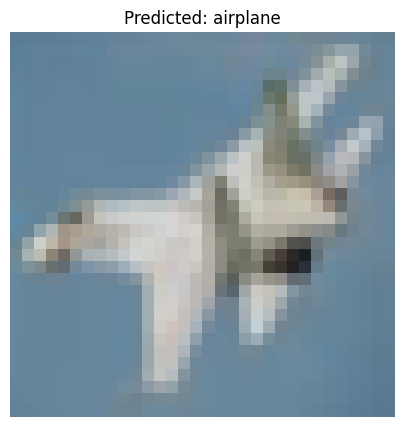

In [16]:
# Show a sample image from the test set along with the predicted output
index = 10  # Change this index to visualize different test images
test_image = np.expand_dims(test_images[index], axis=0)
predicted_class = np.argmax(model.predict(test_image))
plt.figure(figsize=(5,5))
plt.imshow(test_images[index])
plt.title(f'Predicted: {class_names[predicted_class]}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


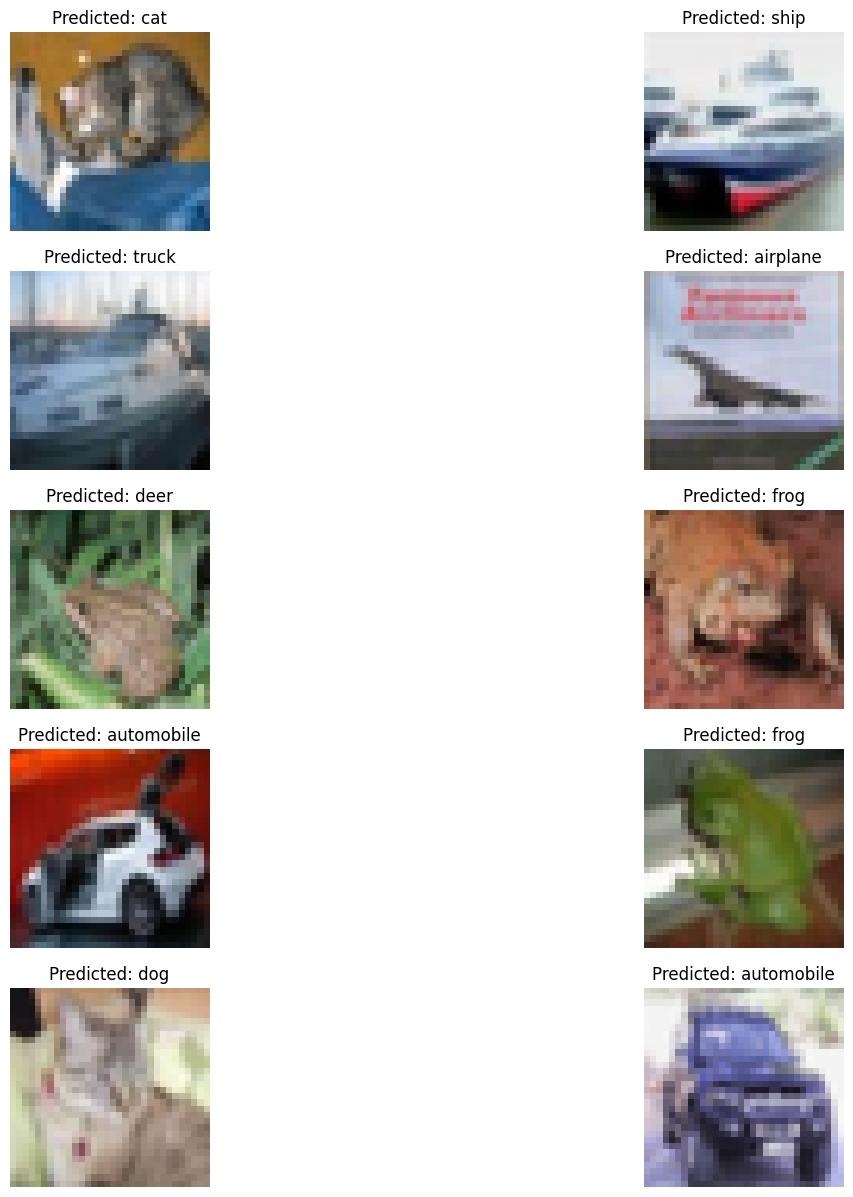

In [19]:
# Show predictions for multiple images from the test set
plt.figure(figsize=(15, 15))
for i in range(10):
    index = i  # Change this index to visualize different test images
    test_image = np.expand_dims(test_images[index], axis=0)
    predicted_class = np.argmax(model.predict(test_image))

    plt.subplot(5, 2, i + 1)
    plt.imshow(test_images[index])
    plt.title(f'Predicted: {class_names[predicted_class]}')
    plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


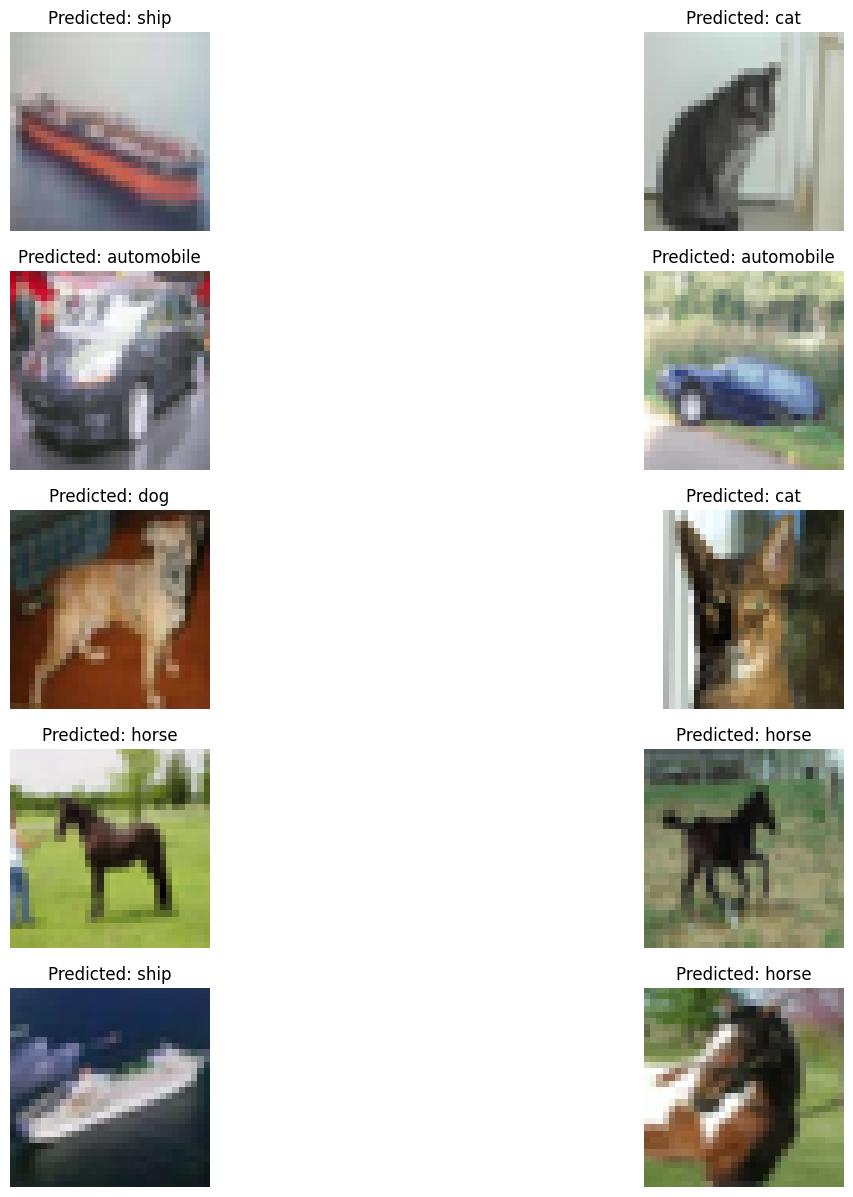

In [25]:
# Shuffle the test data and predictions
shuffle_index_test = np.random.permutation(len(test_images))
test_images_shuffled = test_images[shuffle_index_test]
test_labels_shuffled = test_labels[shuffle_index_test]

# Show shuffled predictions for multiple images from the test set
plt.figure(figsize=(15, 15))
for i in range(10):
    index = i  # Change this index to visualize different test images
    test_image = np.expand_dims(test_images_shuffled[index], axis=0)
    predicted_class = np.argmax(model.predict(test_image))

    plt.subplot(5, 2, i + 1)
    plt.imshow(test_images_shuffled[index])
    plt.title(f'Predicted: {class_names[predicted_class]}')
    plt.axis('off')
plt.show()
